# CODTECH INTERNSHIP TASKS: DATA ANALYSIS


## INTERNSHIP TASK 4: SENTIMENT ANALYSIS



## Sentiment Analysis of IMDB Movie Reviews

### Dataset: https://www.kaggle.com/code/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews/input



### Problem Statement: In this, we have to predict the number of positive and negative reviews based on sentiments by using different classification models.
 

### Step 1: Import Required Libraries And Load The Dataset

In [1]:
!pip install pandas numpy nltk scikit-learn matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Load the dataset
df = pd.read_csv('IMDB-Dataset.csv')

# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


### Step 2: Checking Missing Values

In [5]:
# Check for missing values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

### Step 3: Data Preprocessing

### 3.1: Text Cleaning: Remove HTML tags, special characters, and convert text to lowercase.

In [6]:
import re

def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

df['review'] = df['review'].apply(clean_text)

### 3.2 Tokenization and Stopwords Removal: Tokenize the text and remove stopwords.

In [7]:
stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

df['review'] = df['review'].apply(tokenize_and_remove_stopwords)

### Step 4: Splitting Dataset

In [8]:
# Split the dataset into features (X) and target (y)
X = df['review']
y = df['sentiment'].map({'positive': 1, 'negative': 0})

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
print(X_train)

39087    thats kept asking many fights screaming matche...
30893    watch entire movie could watch entire movie st...
45278    touching love story reminiscent mood love draw...
16398    latterday fulci schlocker totally abysmal conc...
13653    first firmly believe norwegian movies continua...
                               ...                        
11284    shadow magic recaptures joy amazement first mo...
44732    found movie quite enjoyable fairly entertainin...
38158    avoid one terrible movie exciting pointless mu...
860      production quite surprise absolutely love obsc...
15795    decent movie although little bit short time pa...
Name: review, Length: 40000, dtype: object


In [11]:
print(X_test)

33553    really liked summerslam due look arena curtain...
9427     many television shows appeal quite many differ...
199      film quickly gets major chase scene ever incre...
12447    jane austen would definitely approve onegwynet...
39489    expectations somewhat high went see movie thou...
                               ...                        
28567    although casper van dien michael rooker genera...
25079    liked movie wasnt really sure started watching...
18707    yes nonsingaporeans cant see whats big deal fi...
15200    far films go likable enough entertaining chara...
5857     saw anatomy years ago dubbed friends house don...
Name: review, Length: 10000, dtype: object


### Step 5: Feature Extraction


### 5.1: Using TF-IDF Vectorizer: Convert text data into numerical features using TF-IDF.

In [12]:
tfidf = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [13]:
X_train_tfidf

<40000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 3079574 stored elements in Compressed Sparse Row format>

In [14]:
X_test_tfidf

<10000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 771644 stored elements in Compressed Sparse Row format>

### Step 6: Model Implementation
    
    
### 6.1: Naive Bayes Classifier

In [15]:
# Train the Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_nb = nb.predict(X_test_tfidf)

# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8499
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Confusion Matrix:
 [[4201  760]
 [ 741 4298]]


### 6.2: Logistic Regression

In [16]:
# Train the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test_tfidf)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.887
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix:
 [[4330  631]
 [ 499 4540]]


### 6.3: Support Vector Machine (SVM)

In [17]:
from sklearn.svm import LinearSVC

# Train LinearSVC
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test_tfidf)

# Evaluate the model
print("LinearSVC Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

LinearSVC Accuracy: 0.8797
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Confusion Matrix:
 [[4309  652]
 [ 551 4488]]


### Step 7: Visualization


### 7.1: Accuracy Comparison

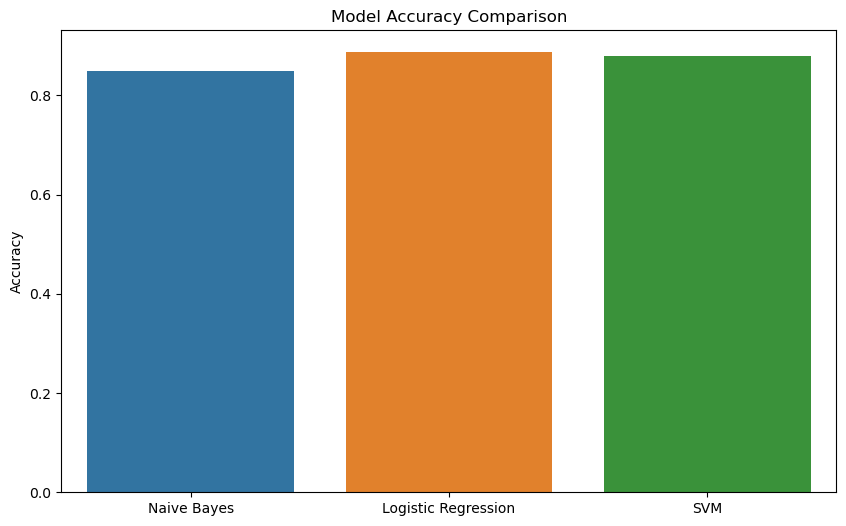

In [18]:
# Compare model accuracies
models = ['Naive Bayes', 'Logistic Regression', 'SVM']
accuracies = [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_svm)]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

### 7.2:  Confusion Matrix Visualization


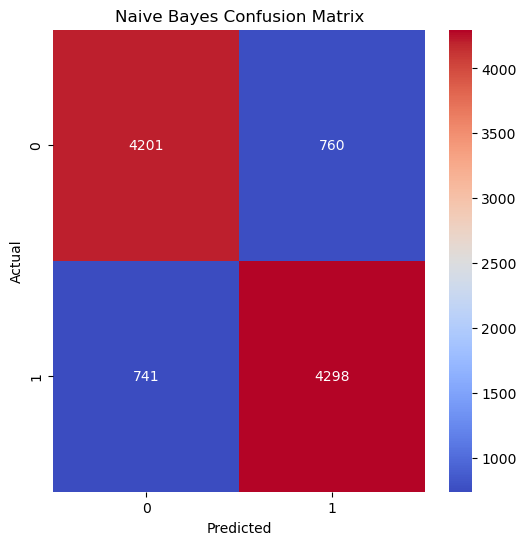

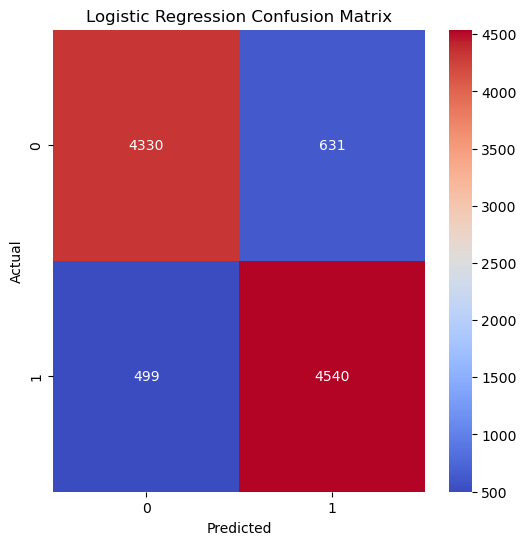

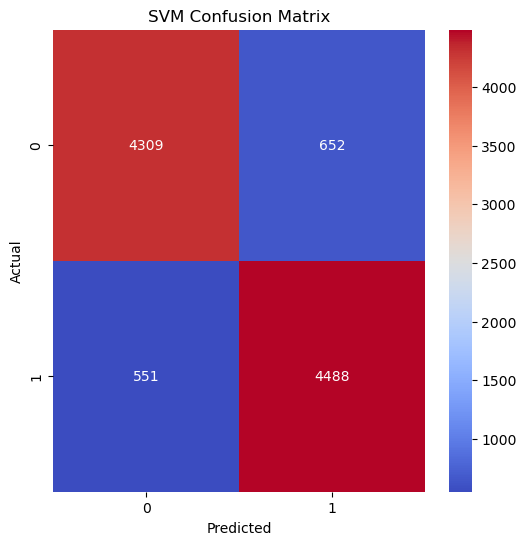

In [20]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    
# Plot confusion matrices for each model
plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_lr, 'Logistic Regression Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_svm, 'SVM Confusion Matrix')

### Step 8: Insights and Conclusion


#### Logistic Regression: Best accuracy (88.7%), balanced precision/recall, fewest misclassifications. Logistic Regression is the top choice for this sentiment analysis task due to its high accuracy and efficiency. 

#### LinearSVC: Close second (87.97% accuracy), robust but slightly slower. LinearSVC is a strong alternative for robust performance.

#### Naive Bayes: Simplest but least accurate (84.99%). Naive Bayes is good for quick baselines but underperforms for complex datasets.

#### Logistic Regression is the best-performing model for IMDB sentiment analysis, achieving 88.7% accuracy.